In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
custom_style = {'axes.labelcolor': 'white',
                'xtick.color': 'white',
                'ytick.color': 'white'}
sns.set_style("darkgrid", rc=custom_style)
sns.set_context("talk")
plt.style.use('dark_background')

df_wine = pd.read_csv('../dataset/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ashs',
                  'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
                  'Proanthcyanins', 'Color itensity', 'Hue', 'OD280/OD315 of diluted wines',
                  'Proline']
X = df_wine.loc[: , df_wine.columns != 'Class label']
y = df_wine.loc[:,'Class label']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.fit_transform(X_test)

In [3]:
from sklearn.datasets import make_moons

### 半月形の分離

In [4]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)

In [24]:
df = pd.DataFrame(X, columns=['x1', 'x2'])
df['y'] = pd.DataFrame(y)

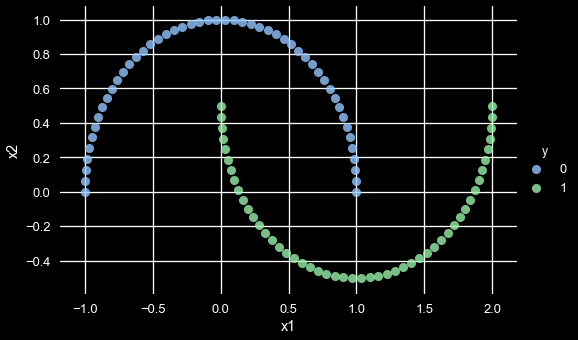

In [25]:
sns.lmplot(x='x1', y='x2', data= df, hue='y', palette='pastel', fit_reg=False, aspect=1.5)

### 線形PCAを試したらどうなるか（失敗するが）

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [7]:
df2 = pd.DataFrame(X_pca, columns={'x1', 'x2'})
df2['y'] = pd.DataFrame(y)

Text(0.5,0,'PC1')

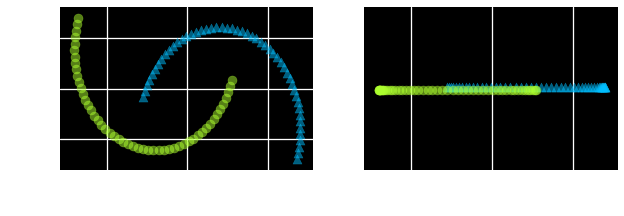

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,3))
ax[0].scatter(X_pca[y==0, 0], X_pca[y==0, 1], color='deepskyblue', marker = '^', alpha=0.5)
ax[0].scatter(X_pca[y==1, 0], X_pca[y==1, 1], color='greenyellow', marker = 'o', alpha=0.5)
ax[1].scatter(X_pca[y==0, 0], np.zeros((50,1)) + 0.02, color='deepskyblue', marker = '^', alpha=0.5)
ax[1].scatter(X_pca[y==1, 0], np.zeros((50,1)) - 0.02, color='greenyellow', marker = 'o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

In [25]:
%run Kernel_PCA.py
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)

<Figure size 432x288 with 0 Axes>

Text(0.5,0,'PC1')

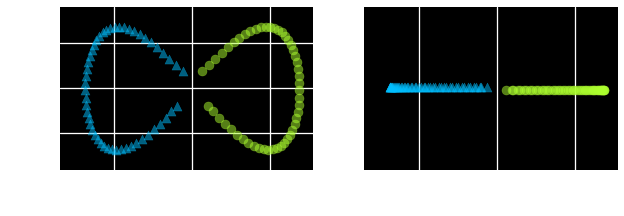

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='deepskyblue', marker = '^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='greenyellow', marker = 'o', alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((50,1)) + 0.02, color='deepskyblue', marker = '^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50,1)) - 0.02, color='greenyellow', marker = 'o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

### 同心円の分離

In [27]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

In [28]:
df2 = pd.DataFrame(X, columns=['x1', 'x2'])
df2['y'] = pd.DataFrame(y)

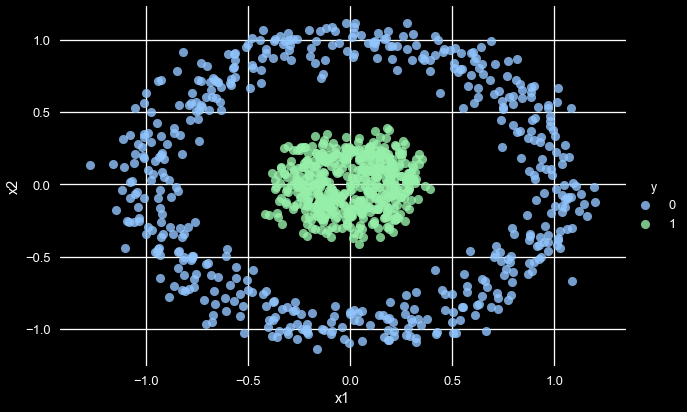

In [32]:
sns.lmplot(x='x1', y='x2', data=df2, hue='y', palette='pastel', fit_reg=False, size=6, aspect=1.5)

Text(0.5,0,'PC1')

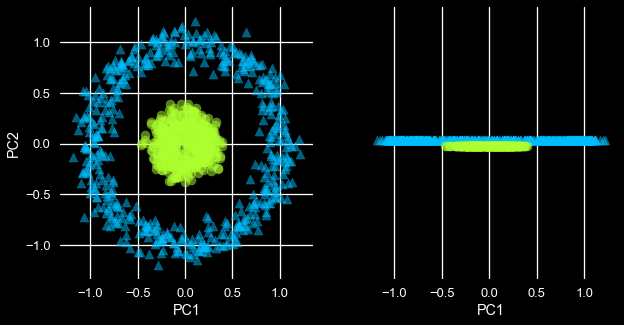

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].scatter(X_pca[y==0, 0], X_pca[y==0, 1], color='deepskyblue', marker = '^', alpha=0.5)
ax[0].scatter(X_pca[y==1, 0], X_pca[y==1, 1], color='greenyellow', marker = 'o', alpha=0.5)
ax[1].scatter(X_pca[y==0, 0], np.zeros((500,1)) + 0.02, color='deepskyblue', marker = '^', alpha=0.5)
ax[1].scatter(X_pca[y==1, 0], np.zeros((500,1)) - 0.02, color='greenyellow', marker = 'o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

Text(0.5,0,'PC1')

<Figure size 432x288 with 0 Axes>

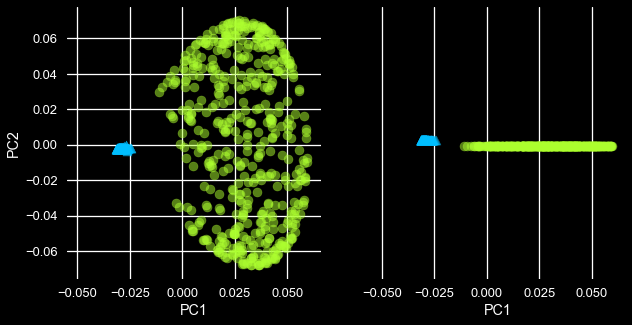

In [36]:
%run Kernel_PCA.py
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='deepskyblue', marker = '^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='greenyellow', marker = 'o', alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((500,1)) + 0.02, color='deepskyblue', marker = '^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((500,1)) - 0.02, color='greenyellow', marker = 'o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

### 新しいデータセットに対してカーネルPCAを適用する方法

In [39]:
X, y= make_moons(n_samples=100, random_state=123)
%run Kernel_PCA.py
alphas, lambdas = rbf_kernel_pca(X, gamma=15, n_components=1)

In [40]:
X_new = X[25]
X_new

array([1.8713187 , 0.00928245])

In [42]:
X_proj = alphas[25]
X_proj

array([0.07877284])

In [45]:
def project_x(X_new, X, gamma, alphas, lambdas):
    pair_dist = np.array([np.sum((X_new - row)**2) for row in X])
    k = np.exp(-gamma * pair_dist)
    return k.dot(alphas / lambdas)

In [46]:
X_reproj = project_x(X_new, X, gamma=15, alphas=alphas, lambdas=lambdas)
X_reproj

array([0.07877284])

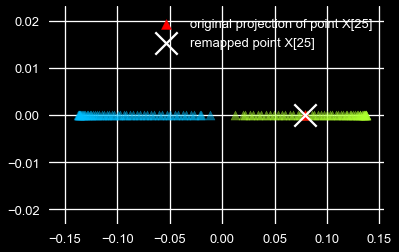

In [52]:
plt.scatter(alphas[y==0, 0], np.zeros((50)), color='deepskyblue', marker='^', alpha=0.5)
plt.scatter(alphas[y==1, 0], np.zeros((50)), color='greenyellow', marker='^', alpha=0.5)
plt.scatter(X_proj, 0, color='red', marker = '^', s=100,label='original projection of point X[25]')
plt.scatter(X_reproj, 0, color='white', marker = 'x', s=500,label='remapped point X[25]')
plt.legend(scatterpoints=1)
plt.legend()